In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 例題22 モンテカルロ積分の平均値と分散

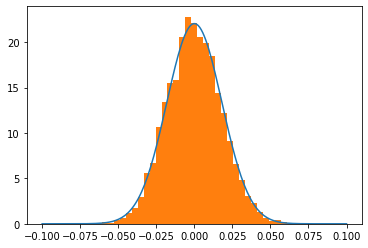

In [2]:
N, M = 100, 10000   # N個のサンプリング点での積分をM回行う
X = np.random.rand(N, M)
ans = np.average(np.exp(-X), axis=0)  # M回分の積分結果を取得
ans = np.array(ans) - (1-np.exp(-1))  # 結果を母平均Iから測る
x = np.linspace(-0.1,0.1,200)
s2 = -0.5*(1-np.exp(-1))*(1-3*np.exp(-1))/N
y = np.exp(-x**2/s2/2)/np.sqrt(2*np.pi*s2)
plt.plot(x, y)  # 平均0, 分散s2の正規分布関数のプロット
plt.hist(ans, 51, (-0.1,0.1), density=True)
 # 第1~3引数はそれぞれ関数, ビンの数, ビンの(下限,上限)
 # density=Trueとすると、積分値が1となるよう振幅が調整される
plt.show()

# 例題23 多次元モンテカルロ積分

In [3]:
from scipy.special import gamma
d, N = 3, 100000
d_sphere = lambda x: np.linalg.norm(x, axis=0)<1
I = np.power(np.pi, d/2) / gamma(d/2+1)
ans = 2**d*np.average(d_sphere(np.random.rand(d, N)))
print(ans-I)

-0.0010302047863914865


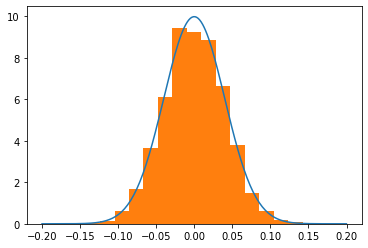

In [4]:
# テキストには含まれない
d, N, M = 3, 10000, 3000
X = np.random.rand(d, N, M)
d_sphere = lambda x: np.linalg.norm(x,axis=0) < 1
I = np.power(np.pi, d/2) / gamma(d/2+1)
ans = 2**d*(np.average(d_sphere(X), axis=0)) - I
s2 = (I*2**d-I**2)/N
x = np.linspace(-5*np.sqrt(s2), 5*np.sqrt(s2), 200)
y = np.exp(-x**2/s2/2)/np.sqrt(2*np.pi*s2)
plt.plot(x, y)
plt.hist(ans, 21, (-5*np.sqrt(s2),5*np.sqrt(s2)), density=True)
plt.show()

# 例題24 イジング模型のモンテカルロシミュレーションI


In [5]:
def transitions(S, L, J, beta, i, j):
    # Sはスピン状態を表すLxL行列. betaは逆温度.
    # i,jはスピンフリップを試行するサイトインデックス.
    dH = 2*J*S[i,j] * (S[(i-1)%L, j] + S[(i+1)%L, j] \
                     + S[i, (j-1)%L] + S[i, (j+1)%L])
    # 周期境界条件を反映する単純な方法として、mod(%)を用いた
    # 係数の2は, エネルギーの差分は各結合につき2Jである事による
    T = np.exp(-dH * beta)
    return np.minimum(T, 1.0)

In [6]:
def run(S, L, J, beta, nmax):
    for n in range(nmax):
        i, j = np.random.randint(0, L, 2)
        T = transitions(S, L, J, beta, i, j)
        flip = 1 - 2*(np.random.rand()<T)
        # Tが乱数以下であればfilp=-1, 以上であればflip=+1
        S[i,j] *= flip
        if n%10000==0:
            plt.clf()
            plt.imshow(S)
            plt.pause(1e-5)

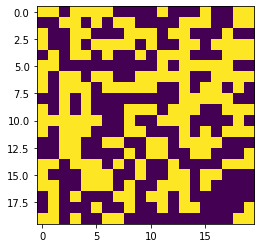

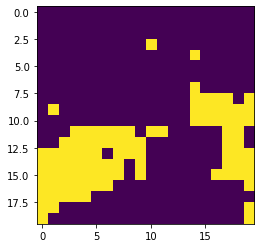

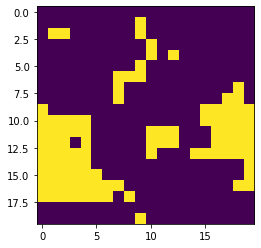

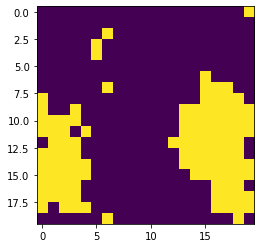

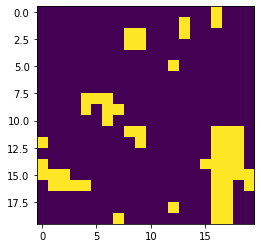

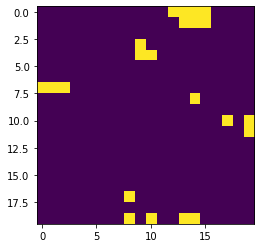

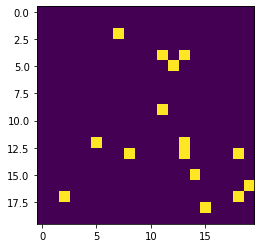

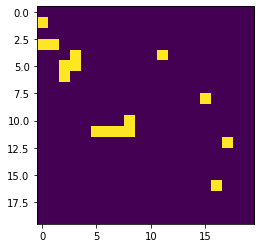

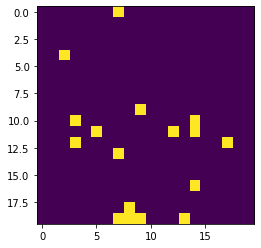

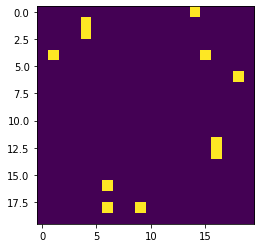

In [7]:
L, J, beta, nmax = 20, 1, 0.5, 100000
S0 = 1 - 2*(np.random.rand(L, L)<0.5)
run(S0, L, J, beta, nmax)

# 例題25 イジング模型のモンテカルロシミュレーションII


In [8]:
def run(S, L, J, beta, nmax, nmeasure):
    Ms, Ts = [], []
    for n in range(nmax):
        i, j = np.random.randint(0, L, 2)
        T = transitions(S, L, J, beta, i, j)
        Ts.append(np.random.rand()<T)
        flip = 1 - 2*Ts[-1]
        S[i,j] *= flip
        if n%nmeasure==0: Ms.append(np.average(S))
    return np.array(Ms), np.array(Ts)

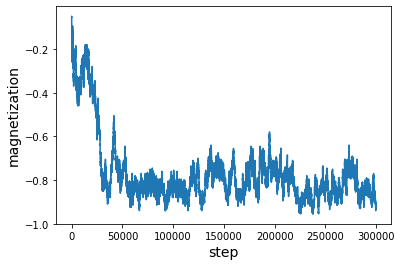

In [9]:
L, J, beta, nmax, nmeasure = 20, 1, 1/2.2, 300000, 1
S0 = 1 - 2*(np.random.rand(L, L)<0.5)
Ms, Ts = run(S0, L, J, beta, nmax, nmeasure)
plt.xlabel("step", fontsize=14)
plt.ylabel("magnetization", fontsize=14)
plt.plot(Ms)
plt.show()

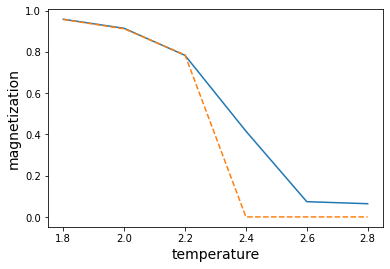

In [10]:
L, J, nmax, ntherm, nmeasure = 20, 1, 500000, 100000, 2500
kBTs = [1.8, 2.0, 2.2, 2.4, 2.6, 2.8]
Ms, Is = [], []
for kBT in kBTs:
    S0 = 1 - 2*(np.random.rand(L, L)<0.5)
    M0, _ = run(S0, L, J, 1/kBT, nmax, nmeasure)
    M = np.average(M0[ntherm//nmeasure:])
    Ms.append(abs(M))
    Is.append((1-1/np.sinh(2*J/kBT)**4)**(1/8) if kBT<2.26 else 0)
plt.xlabel("temperature", fontsize=14)
plt.ylabel("magnetization", fontsize=14)
plt.plot(kBTs, Ms, ls="solid")
plt.plot(kBTs, Is, ls="dashed")
plt.show()